# Data analysis in python

This notebook analyzes data from measurements of the physical-chemical characteristics of different wines, as well as their quality.

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )
1) Alcohol

2) Malic acid

3) Ash

4) Alcalinity of ash  

5) Magnesium

6) Total phenols

7) Flavanoids

8) Nonflavanoid phenols

9) Proanthocyanins

10)Color intensity

11)Hue

12)OD280/OD315 of diluted wines

13)Proline

Openly available at: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
      

In [60]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [45]:
# Load the Wine dataset
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [46]:
# Assign column names
columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
           'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
           'OD280/OD315 of diluted wines', 'Proline']
wine.columns = columns

In [47]:
# Display the first few rows of the dataset
print(wine.head())

   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

In [48]:
# Get information about the dataset
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [49]:
# Statistical summary of the dataset
print(wine.describe())

            Class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

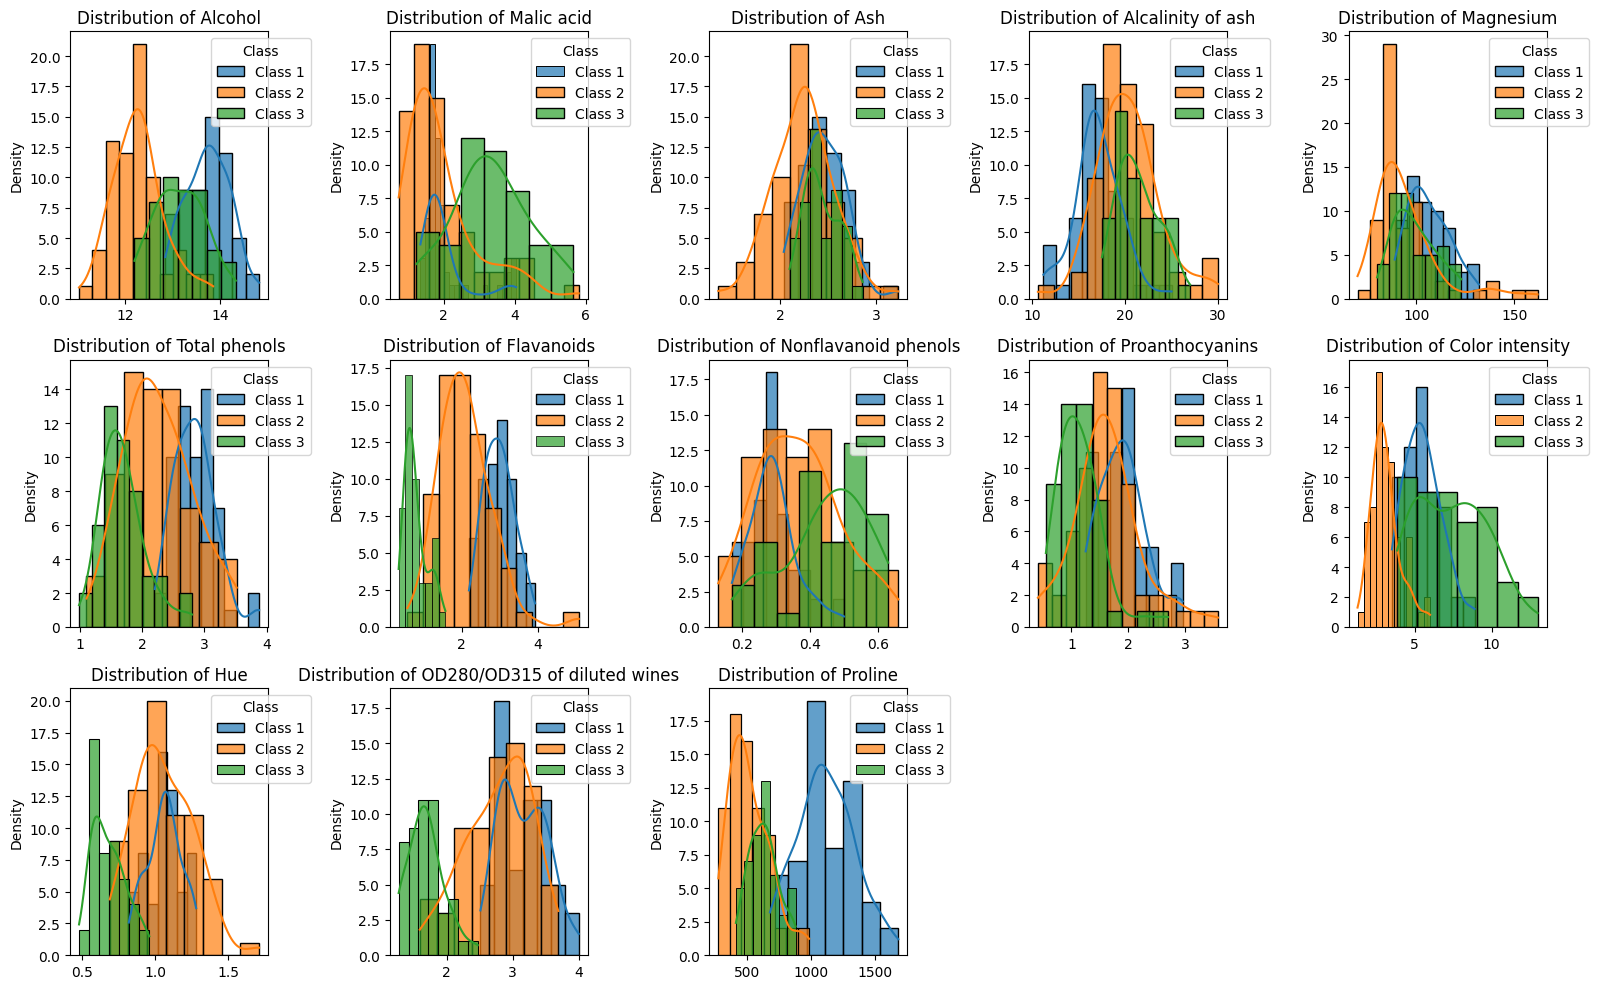

In [50]:
# Visualization of feature distribution by class
plt.figure(figsize=(16, 10))
for i, feature in enumerate(wine.columns[1:]):
    plt.subplot(3, 5, i + 1)
    for cls in wine['Class'].unique():
        sns.histplot(data=wine[wine['Class'] == cls], x=feature, kde=True, label=f'Class {cls}', color=f'C{cls-1}', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')
    plt.ylabel('Density')
    plt.legend(title='Class', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

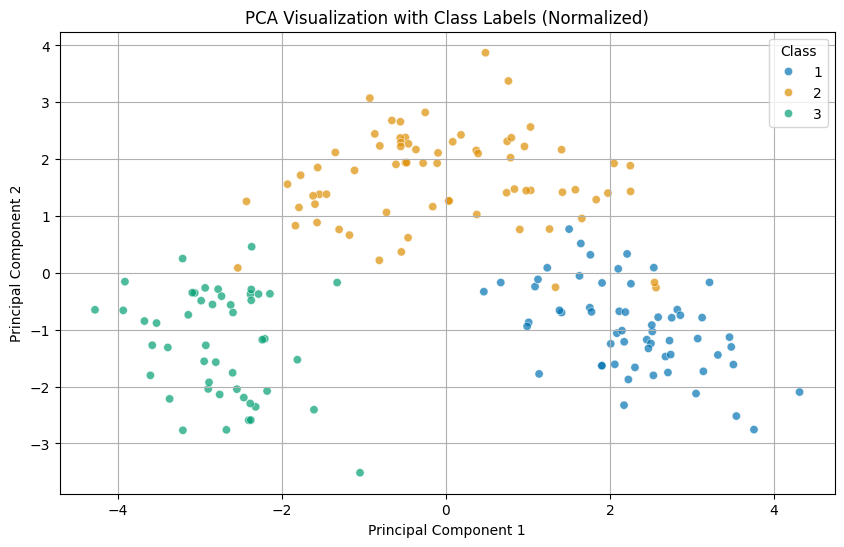

In [51]:
# Separate features (X) from labels (y)
X = wine.drop('Class', axis=1)
y = wine['Class']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit the PCA model
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with principal components and labels
pca_df = pd.DataFrame(data=X_pca, columns=['Component 1', 'Component 2'])
pca_df['Class'] = y

# Visualization of PCA with different colors for each class
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='Component 1', y='Component 2', hue='Class', palette='colorblind', alpha=0.7)
plt.title('PCA Visualization with Class Labels (Normalized)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.grid(True)
plt.show()

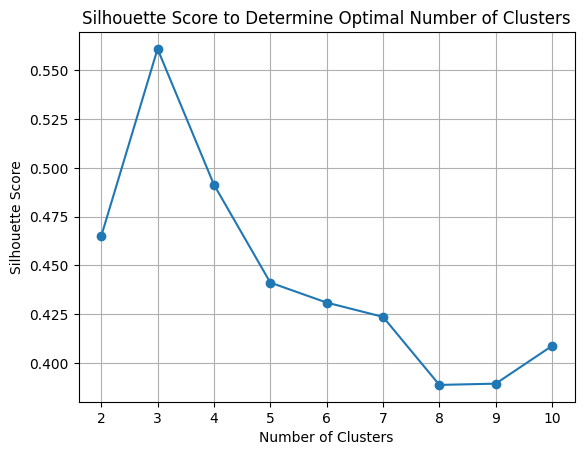

Optimal number of clusters: 3


In [61]:
# Calculate silhouette score for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualize silhouette score for different numbers of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score to Determine Optimal Number of Clusters')
plt.grid(True)
plt.show()

# Find the optimal number of clusters
optimal_n_clusters = np.argmax(silhouette_scores) + 2  # Add 2 to account for starting from 2 clusters

print("Optimal number of clusters:", optimal_n_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


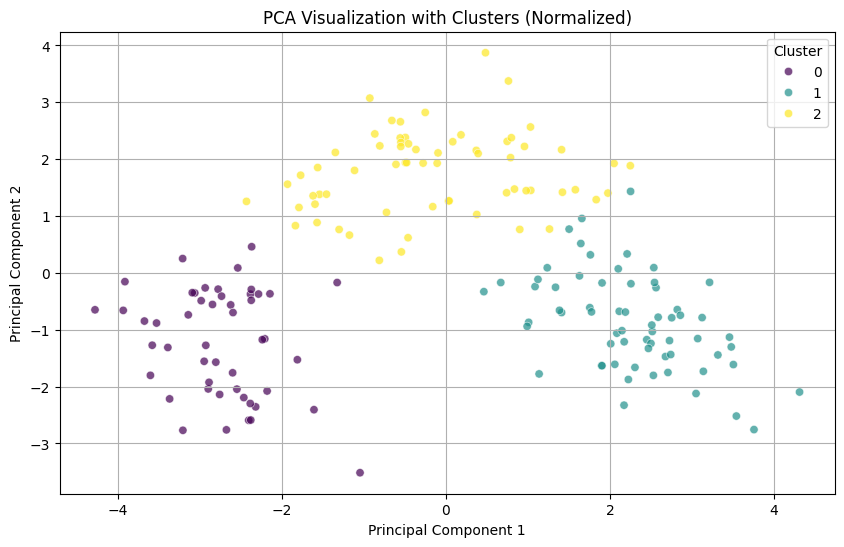

In [62]:
# Initialize and fit K-Means clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Visualization of PCA with different colors for each cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='Component 1', y='Component 2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('PCA Visualization with Clusters (Normalized)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

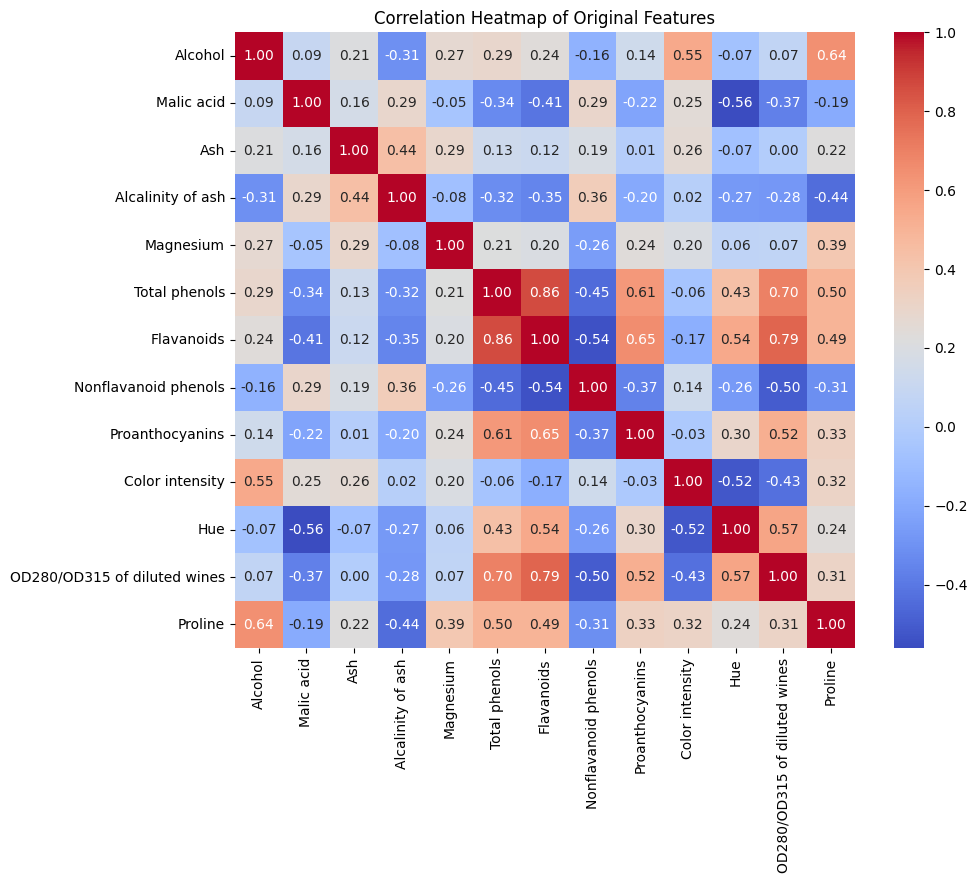

In [52]:
# Calculate the correlation matrix between original features
correlation_matrix = wine.drop('Class', axis=1).corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Original Features')
plt.show()

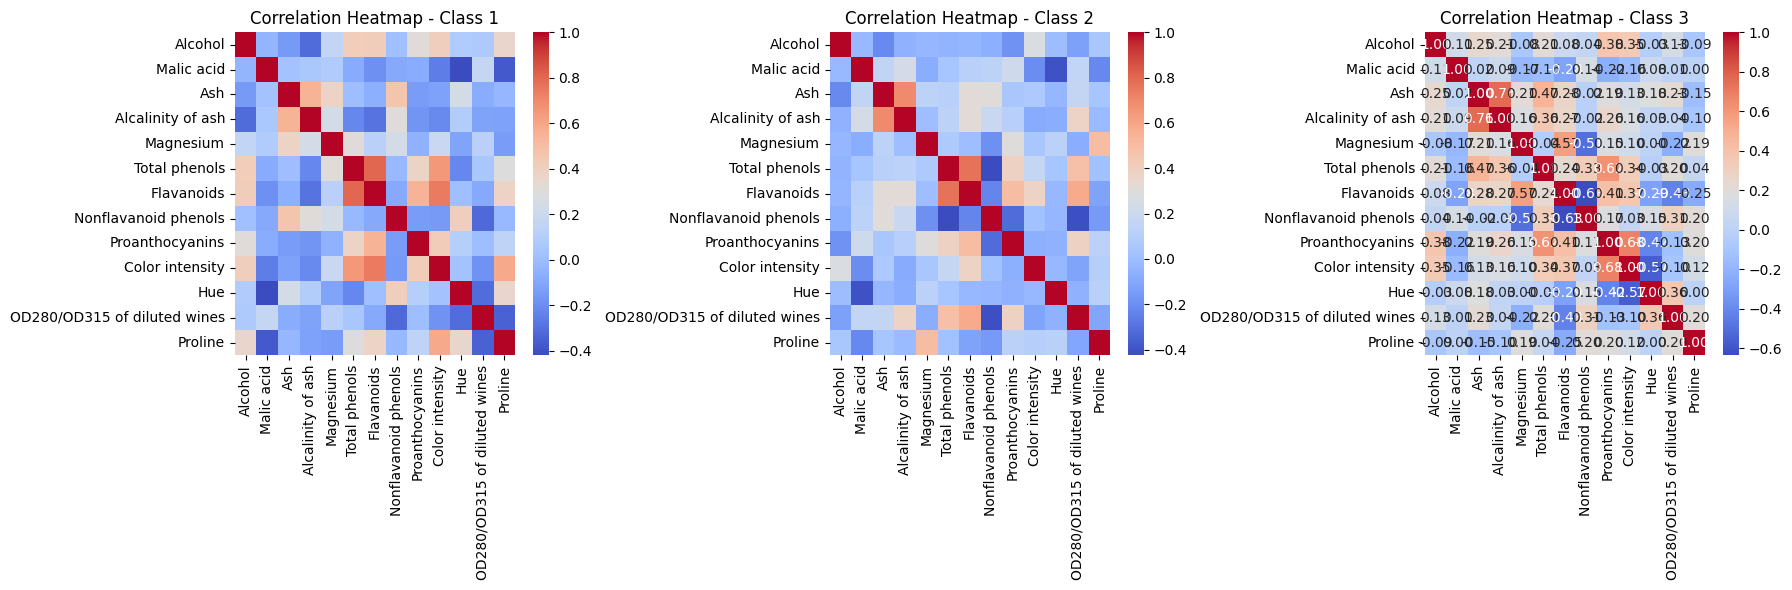

In [53]:
# Separate the data by class
wine_class_1 = wine[wine['Class'] == 1].drop('Class', axis=1)
wine_class_2 = wine[wine['Class'] == 2].drop('Class', axis=1)
wine_class_3 = wine[wine['Class'] == 3].drop('Class', axis=1)

# Calculate correlation matrices for each class
correlation_matrix_class_1 = wine_class_1.corr()
correlation_matrix_class_2 = wine_class_2.corr()
correlation_matrix_class_3 = wine_class_3.corr()

# Plot correlation heatmaps for each class with adjusted layout
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(correlation_matrix_class_1, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Heatmap - Class 1')
sns.heatmap(correlation_matrix_class_2, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Heatmap - Class 2')
sns.heatmap(correlation_matrix_class_3, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[2])
axes[2].set_title('Correlation Heatmap - Class 3')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

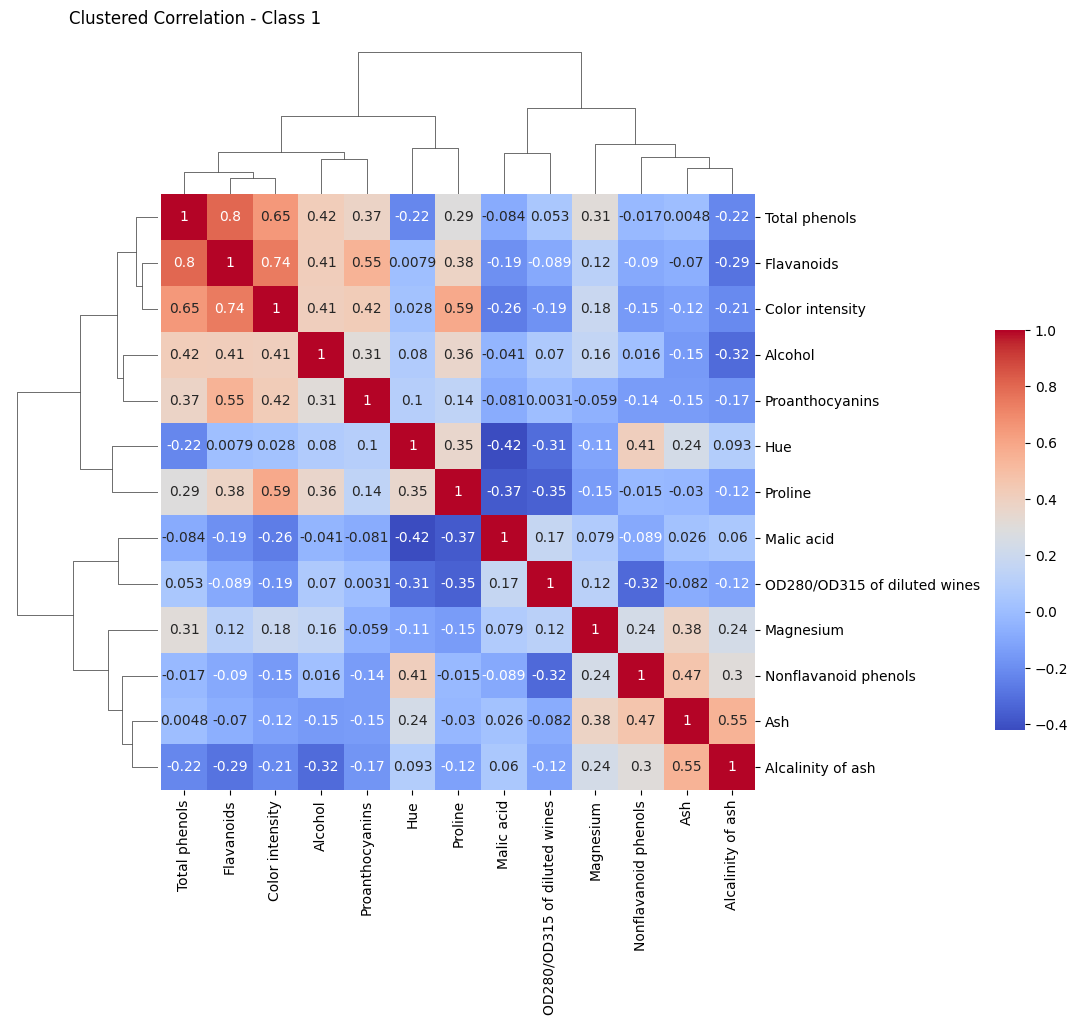

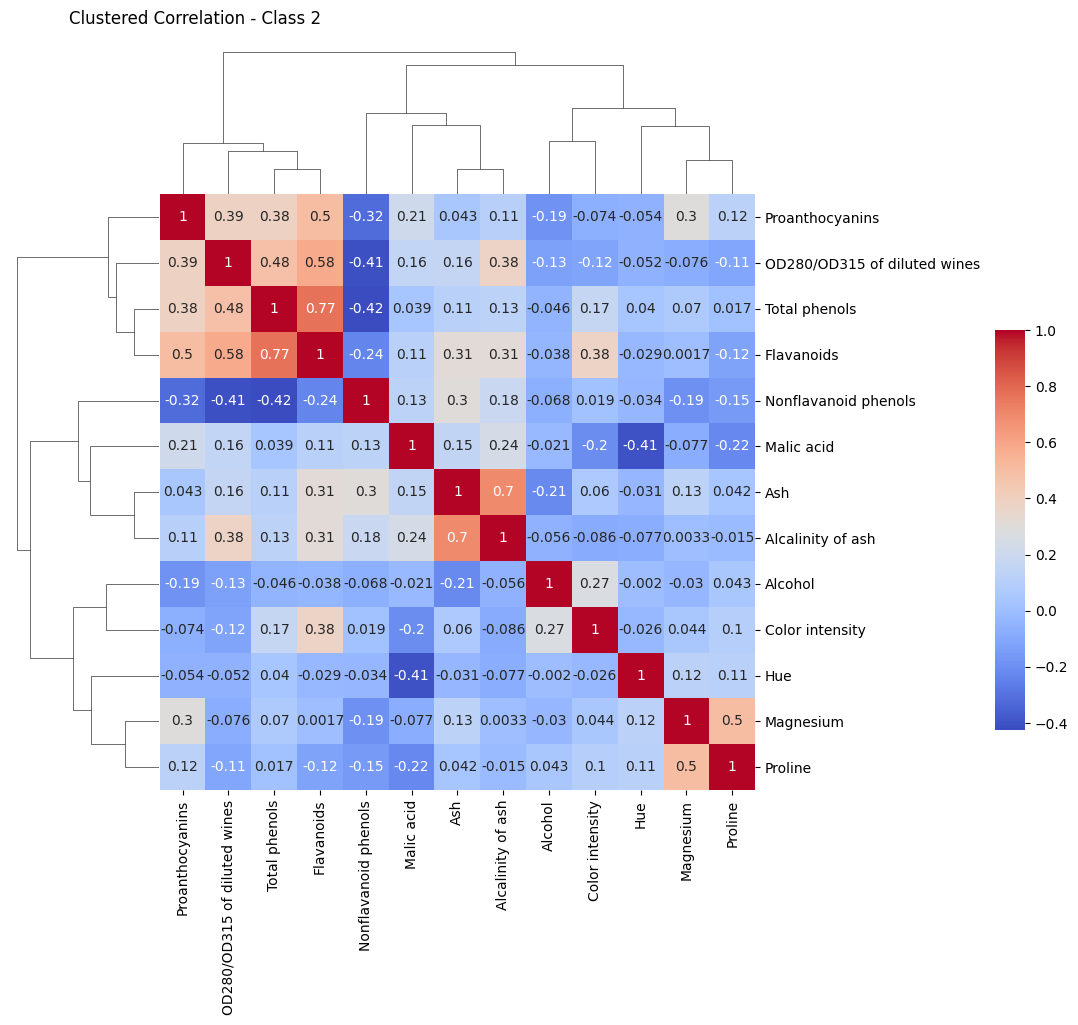

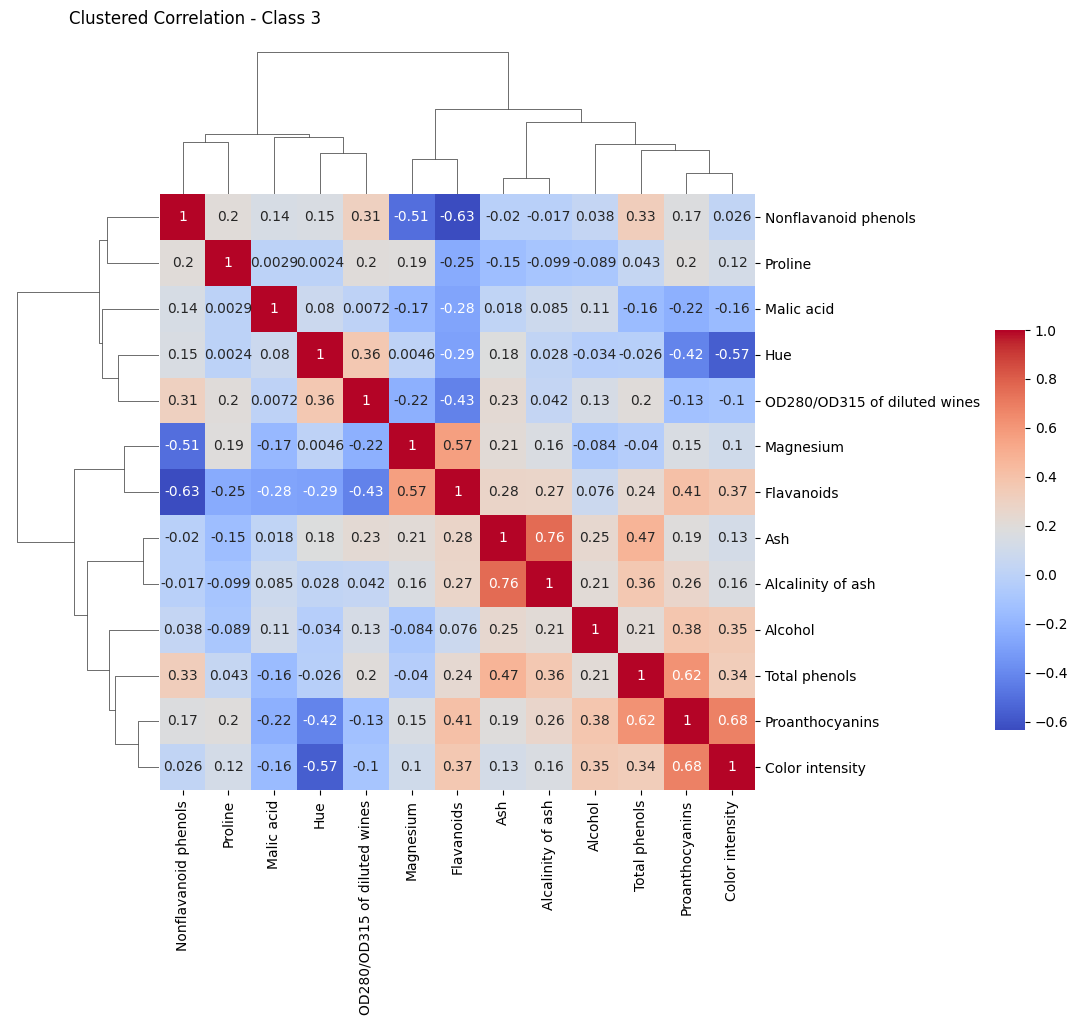

In [54]:
# Define a function to perform clustering on each correlation matrix
def perform_clustering_and_plot(correlation_matrix, title):
    # Cluster the heatmap using hierarchical clustering
    linkage = hierarchy.linkage(correlation_matrix, method='ward')
    g = sns.clustermap(correlation_matrix, row_linkage=linkage, col_linkage=linkage, annot=True, cmap='coolwarm', cbar_pos=(1.0, 0.3, 0.03, 0.4))
    g.fig.suptitle(f'Clustered Correlation - {title}', x=0.2, y=1.02)
    plt.show()

# Perform clustering and plot for each correlation matrix representing each class
perform_clustering_and_plot(correlation_matrix_class_1, 'Class 1')
perform_clustering_and_plot(correlation_matrix_class_2, 'Class 2')
perform_clustering_and_plot(correlation_matrix_class_3, 'Class 3')